## Find the phase difference using FFT

In [1]:
from matplotlib import pyplot as plt
from numpy.fft import fft

import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
def sine_signal(
    t: np.array, A: float, f: float, φ: float
) -> pd.Series:
    """
    φ input in degree unit

    :param t:
    :type t:
    :param A:
    :type A:
    :param f:
    :type f:
    :param φ:
    :type φ:
    :return:
    :rtype:
    """
    ω = 2*np.pi*f
    return pd.Series(A*np.sin(ω*t + np.deg2rad(φ)), index=t)

In [4]:
def phase_correction(phase: list):
    """
    phase correction

    :param phase:
    :type phase: list
    :return:
    :rtype:

    """
    for i in range(len(phase)):
        if phase[i] > 90.0:
            phase[i] = 180.0 - phase[i]
        if phase[i] < -90.0:
            phase[i] += 180.0
        if phase[i] < 0.0:
            phase[i] = np.abs(phase[i])
    return phase


In [5]:
def phase_diff_by_magnitude(
    magnitude: pd.DataFrame, phase: pd.DataFrame, 
    fs: int, pair_ids: list
):
    # rad to deg
    r2d = 180.0/π

    phase_force = []
    phase_deformation = []
    phase_shift = []

    for pair_id in pair_ids:
        i1, i2 = pair_id

        mag1 = magnitude[i1]
        mag2 = magnitude[i2]

        # force
        _max_val1 = mag1[:fs].max()
        _max_pos1 = np.where(mag1[:fs] == _max_val1)[0][0]

        phase_force.append(phase.iloc[_max_pos1, i1])

        # deformation
        _max_val2 = mag2.iloc[:fs-1].max()
        _max_pos2 = np.where(mag2.iloc[:fs] == _max_val2)[0][0]

        phase_deformation.append(phase.iloc[_max_pos2, i2])

        # phase shift
        phase_shift.append((phase_force[-1] - phase_deformation[-1]) * r2d)

    return phase_correction(phase_shift)

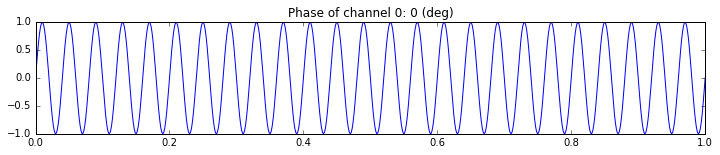

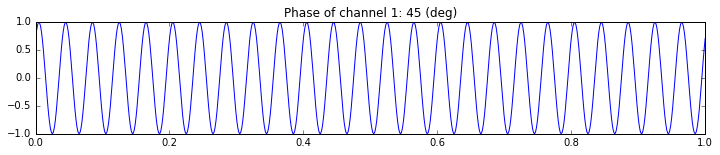

In [6]:
# GENERAL INFO
π = np.pi
channels = 2
φs = [0, 45]  # phase shift of each channel

f = 25

ns = 680
fs = 680

t = np.linspace(0, ns//fs, ns)

df = pd.DataFrame(np.zeros((ns, channels)), index=t)

for i in range(channels):
    φ = φs[i]
    title = 'Phase of channel %s: %s (deg)' % (i, φ)
    df[i] = sine_signal(t, A=1, f=f, φ=φ)
    df[i].plot(title=title, figsize=(12, 2))
    plt.show()

## Using upper bound equa to -1

In [7]:
fft_data = pd.DataFrame(np.zeros((ns, channels)), index=t)

ub = -1

for i in range(channels):
    # cheating
    fft_data.iloc[:ub, i] = fft(df.iloc[:ub, i].values)

In [8]:
phase = pd.DataFrame(np.angle(fft_data), index=t)
magnitude = np.abs(fft_data)

In [9]:
phase_diff = phase_diff_by_magnitude(
    magnitude=magnitude, phase=phase, fs=fs, pair_ids=[[0, 1]]
)

print(phase_diff)

[44.999999999999773]


## Using upper bound equa to None

In [10]:
fft_data = pd.DataFrame(np.zeros((ns, channels)), index=t)

ub = None

for i in range(channels):
    # cheating
    fft_data.iloc[:ub, i] = fft(df.iloc[:ub, i].values)

In [11]:
phase = pd.DataFrame(np.angle(fft_data), index=t)
magnitude = np.abs(fft_data)

In [12]:
phase_diff = phase_diff_by_magnitude(
    magnitude=magnitude, phase=phase, fs=fs, pair_ids=[[0, 1]]
)

print(phase_diff)

[45.042538099017513]
